In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 8]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
with open(f'data/output/model_outputs_20210304192609.json', 'r') as stream:
    model_comparison = json.load(stream)

## get output dfs as well

In [3]:
count = 0
for m in model_comparison.keys():
    plt.plot(outputdfs[count]['score'])
    count += 1
plt.title('n features vs holdout performance')
plt.legend(models)
plt.show()

NameError: name 'outputdfs' is not defined

## -- fitting graph plot for tree modeling

In [23]:
start_depth = 1
end_depth = 20
model_to_run = 'randomforest'

In [24]:
print('Selected features:')
for x in model_comparison[model_to_run]['features']:
    print(f'-- {x}')

Selected features:
-- instrumentalness
-- acousticness
-- duration_ms
-- danceability
-- speechiness
-- valence
-- energy
-- key
-- loudness
-- liveness
-- tempo
-- time_signature
-- mode


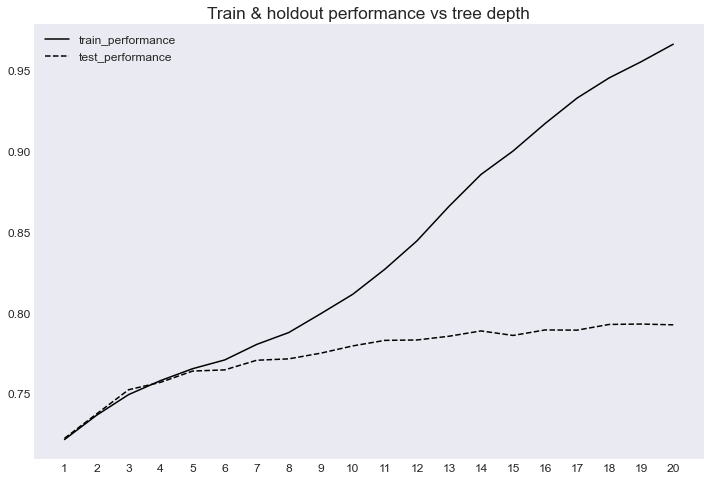

In [25]:
xcolumns = [c for c in df.columns if c != ycolumn]
X = df[xcolumns].values
y = df[ycolumn].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scores = n_node_increase_scores(X_train, y_train, X_test, y_test, range(start_depth, end_depth+1), model_to_run)
plot_fitting_graph(scores)

## -- model explanation & feature importance

### tree classification

In [27]:
model_to_run = 'randomforest'
selected_features = model_comparison[model_to_run]['features']
X = df[selected_features].values
y = df[ycolumn].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
if model_to_run == 'tree':
    classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, random_state=seed)
elif model_to_run == 'randomforest':
    classifier = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=seed)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
score = round(metrics.accuracy_score(y_test, y_predict), 7)

In [28]:
print(f'Accuracy score of {model_to_run} model {round(score, 3)*100}%')

Accuracy score of randomforest model 76.3%


<module 'sklearn.tree' from '/Users/simonvreugdenhil/dev/uva-strategy-analytics/venv/lib/python3.8/site-packages/sklearn/tree/__init__.py'>

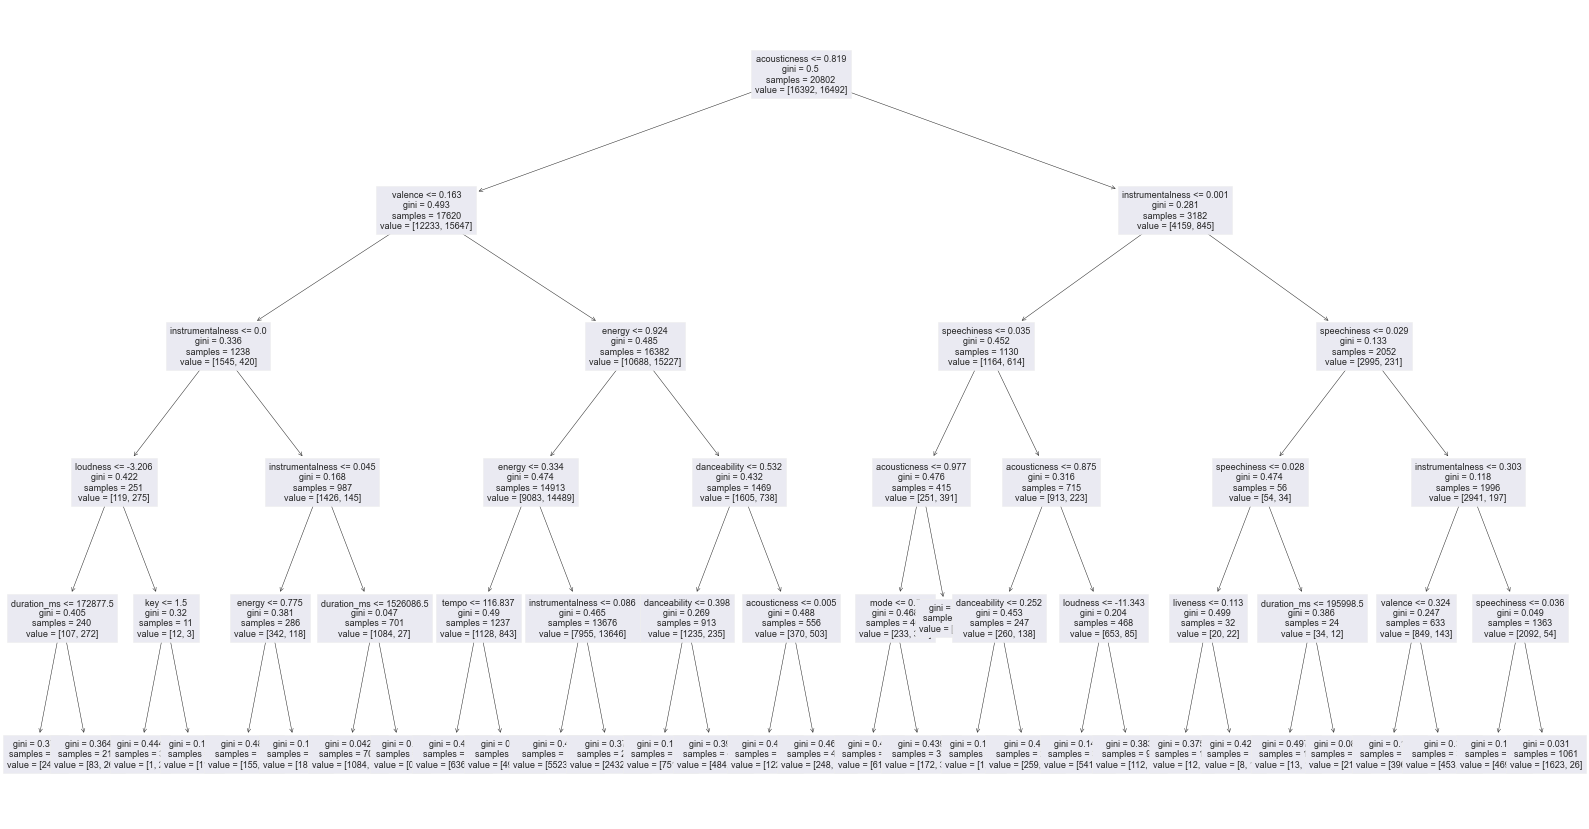

In [29]:
plt.figure(figsize=(28,15))
if model_to_run == 'tree':
    tree.plot_tree(classifier, feature_names=selected_features[:5], fontsize=8.5)
elif model_to_run == 'randomforest':
    tree.plot_tree(classifier.estimators_[0], feature_names=selected_features, fontsize=9)
tree

In [30]:
dfconfusion = pd.DataFrame({
    'y_predict': y_predict,
    'y_test': y_test,
             })
dfconfusion['count'] = 1
dfx = dfconfusion.groupby(['y_predict', 'y_test'], as_index=False)[['count']].sum()
for z in [0, 1]:
    dfx.loc[lambda x: x['y_predict']==z, 'percent'] = round(dfx.loc[lambda x: x['y_predict']==z]['count'] / dfx.loc[lambda x: x['y_predict']==z]['count'].sum(), 3)
#dfx

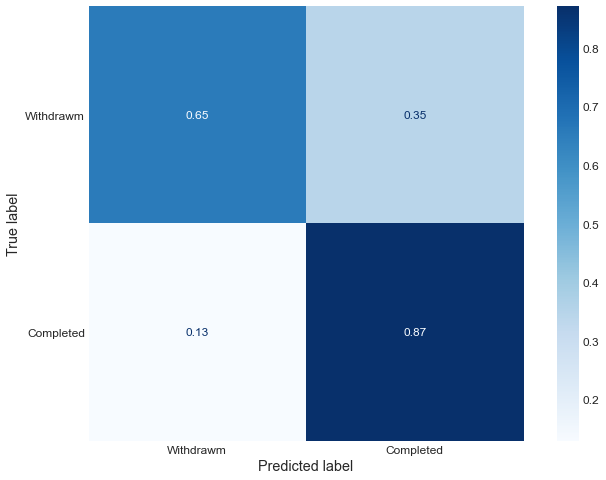

In [31]:
from sklearn.metrics import plot_confusion_matrix
plt.style.use("seaborn-dark")

pltconf = plot_confusion_matrix(classifier,
                                X_test,
                                y_test,
                                display_labels=['Withdrawm', 'Completed'],
                                cmap=plt.cm.Blues,
                                normalize='true')
pltconf

### linear model

In [19]:
model_to_run = 'svm'
selected_features = model_comparison['tree']['features']
X = df[selected_features].values
y = df[ycolumn].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = LinearSVC(max_iter=100000, dual=True, random_state=seed)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
score = round(metrics.accuracy_score(y_test, y_predict), 7)

In [20]:
print(f'Accuracy score of {model_to_run} model {round(score, 3)*100}%')

Accuracy score of svm model 73.2%


<ipython-input-21-101eb93a3f7f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(selected_features)


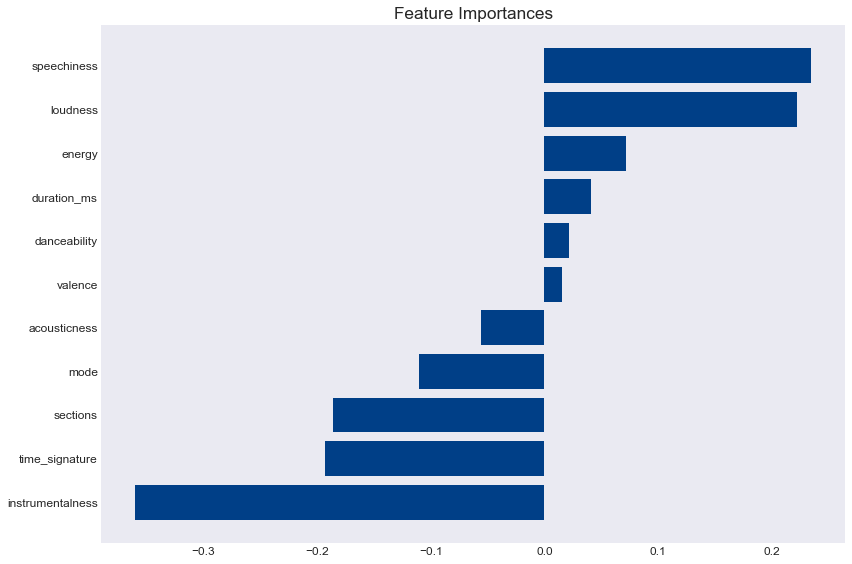

In [21]:
y_ticks = np.arange(0, len(selected_features))
fig, ax = plt.subplots()
ax.barh(y_ticks, sorted(list(classifier.coef_[0]), reverse=False), color='#003F87')
ax.set_yticklabels(selected_features)
ax.set_yticks(y_ticks)
ax.set_title("Feature Importances")
fig.tight_layout()
plt.show()

### all models - best performing configuration

In [4]:
for k, v in model_comparison.items():
    print(f'{k}:')
    print(f"- score {v['score']}")
    print(f"- n features {v['n_features']}")
    print('- features:')
    count = 1
    for x in v['features']:
        print(f'==> {count}: {x}')
        count += 1
    print('')

tree:
- score 0.7126003
- n features 10
- features:
==> 1: instrumentalness
==> 2: time_signature
==> 3: energy
==> 4: duration_ms
==> 5: acousticness
==> 6: danceability
==> 7: valence
==> 8: tempo
==> 9: speechiness
==> 10: sections

svm:
- score 0.7274386
- n features 14
- features:
==> 1: instrumentalness
==> 2: acousticness
==> 3: duration_ms
==> 4: mode
==> 5: speechiness
==> 6: danceability
==> 7: loudness
==> 8: energy
==> 9: valence
==> 10: time_signature
==> 11: key
==> 12: liveness
==> 13: tempo
==> 14: sections

lg:
- score 0.7306008
- n features 13
- features:
==> 1: instrumentalness
==> 2: danceability
==> 3: speechiness
==> 4: loudness
==> 5: liveness
==> 6: mode
==> 7: acousticness
==> 8: energy
==> 9: valence
==> 10: time_signature
==> 11: duration_ms
==> 12: tempo
==> 13: sections

naivebayes:
- score 0.7180735
- n features 8
- features:
==> 1: instrumentalness
==> 2: energy
==> 3: danceability
==> 4: acousticness
==> 5: sections
==> 6: liveness
==> 7: valence
==> 8: 